<a href="https://colab.research.google.com/github/guilhermeguy/data_analysis/blob/master/financial_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Financial Market Data Analysis Project

This should not be used as an investment guide
  

In [0]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

### Data


Acquiring data from the following banks:

* Bank of America
* CitiGroup
* Goldman Sachs 
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

from 2006-01-01 to 2016-01-01


In [0]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016, 1, 1)
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)




In [0]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [0]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.columns.names = (['Bank Ticker', 'Stock Info'])


In [5]:
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  21.485973
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  21.236753
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  21.213186
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  21.337786
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  21.334421

[5 rows x 36 columns]

#### Maximum close price for the period for each stock

In [6]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Returns df

<h3><center>$r_t = \frac{p_t -p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$</center></h3>





In [0]:
returns = pd.DataFrame()

In [8]:
for tick in tickers:
  returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


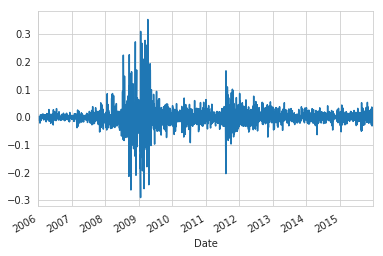

In [9]:
returns['BACReturn'].plot()

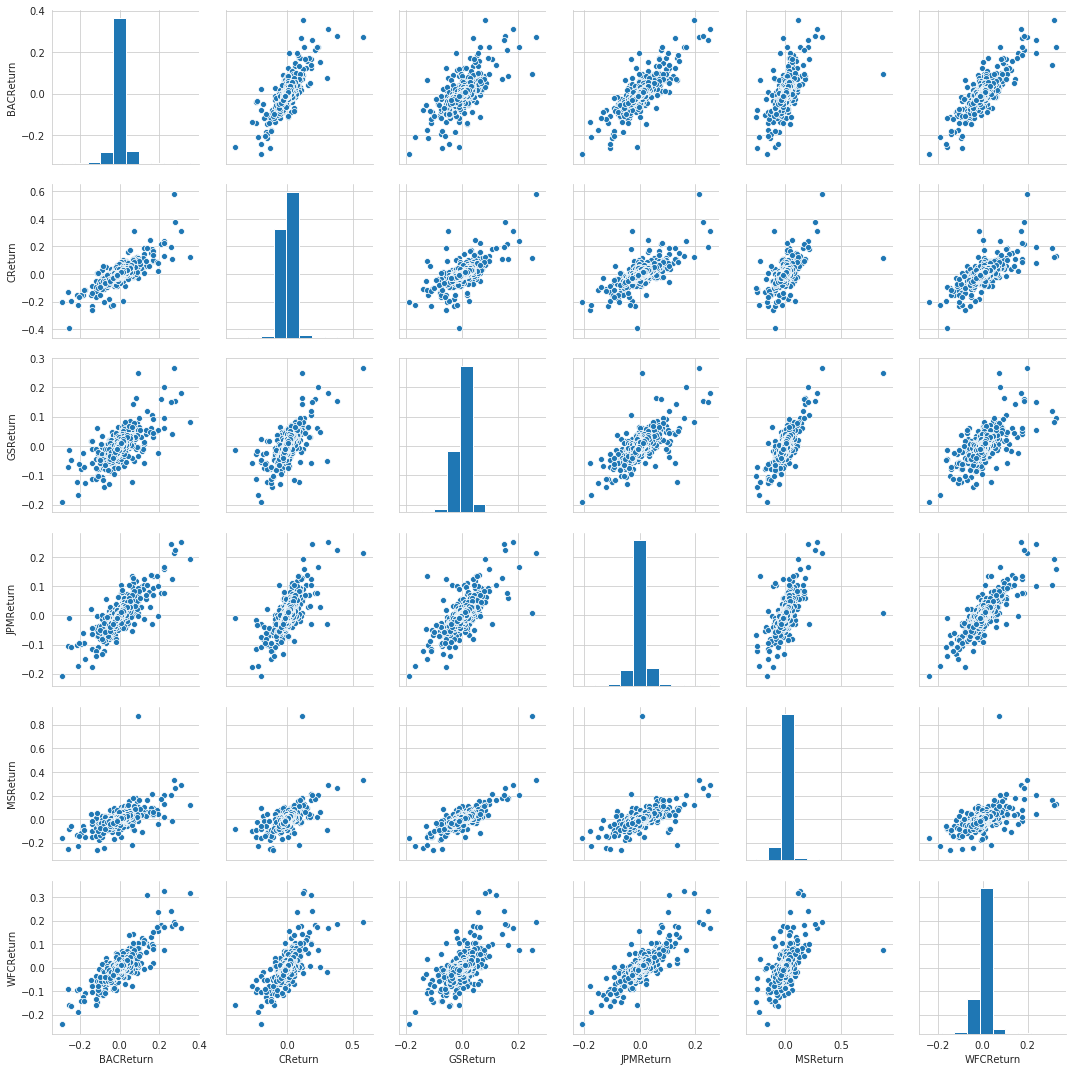

In [10]:
sns.pairplot(data=returns[1:])

In [11]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

#### Standard Deviation

In [13]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [14]:
returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

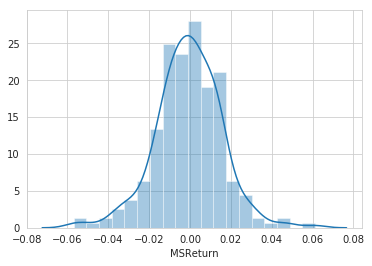

In [15]:
sns.distplot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))]['MSReturn'])

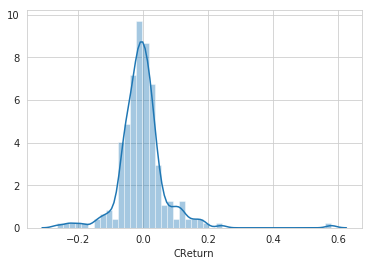

In [16]:
sns.distplot(returns[(returns.index.date >= datetime.date(2008, 1, 1)) & (returns.index.date < datetime.date(2009, 1, 1))]['CReturn'])

#### Close Prices over time by bank

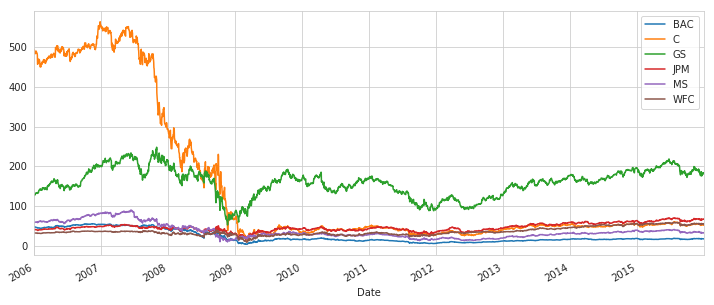

In [23]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(figsize=(12,5), label=tick)
plt.legend()

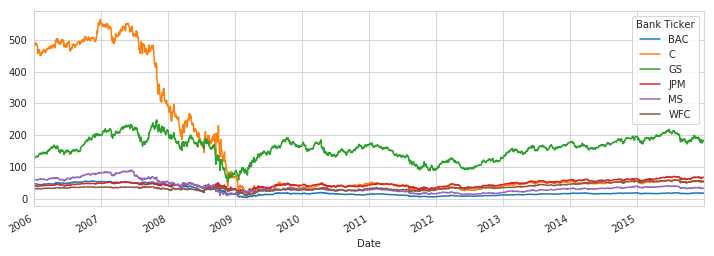

In [25]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1 ).plot(figsize=(12,4))

### Moving Average

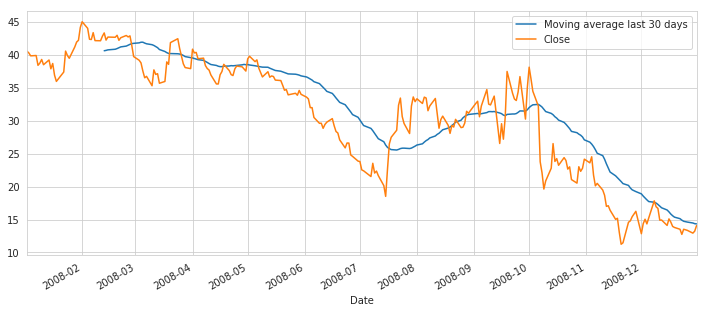

In [35]:
BAC2008 = BAC['Close'][BAC.index.year == 2008]
BAC2008_ma = BAC2008.rolling(window=30).mean().plot(figsize=(12,5), label='Moving average last 30 days')
BAC2008.plot(label='Close')
plt.legend()

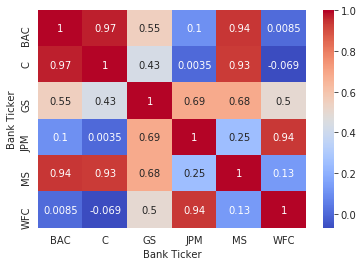

In [46]:
corr = bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

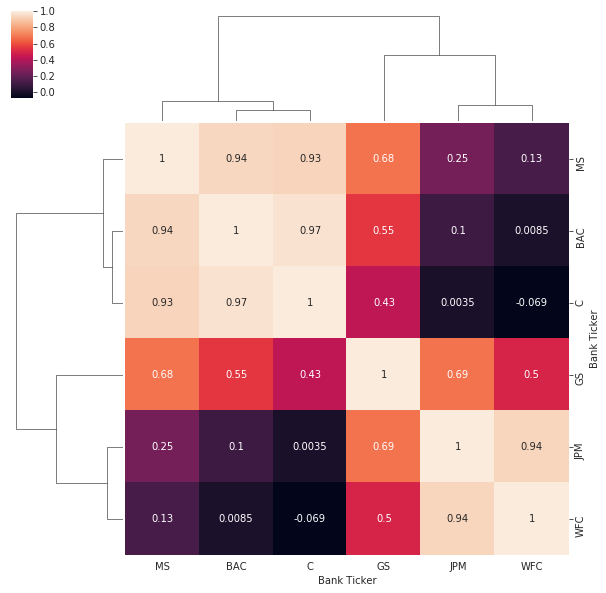

In [48]:
sns.clustermap(corr, annot=True)